### 1. Lendo a chave

In [1]:
from dotenv import load_dotenv

import os

load_dotenv()

True

In [2]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

#### 2. Carregando os livros usando o LangChain  

In [3]:
from langchain.document_loaders import PyPDFLoader

In [5]:
!pip install pypdf

  Using cached pypdf-4.2.0-py3-none-any.whl.metadata (7.4 kB)
Using cached pypdf-4.2.0-py3-none-any.whl (290 kB)


In [15]:
# Pegando os livros
cosmos = PyPDFLoader("../PDF/cosmos_de_carl_sagan.pdf")
moyses = PyPDFLoader("../PDF/Moyses_Mecanica.pdf")
darwin = PyPDFLoader("../PDF/darwin1.pdf")
freakeconomis = PyPDFLoader("../PDF/freakeconomis.pdf")

# Carregando os livros
loader_CO = cosmos.load()
loader_MO = moyses.load()
loader_DW = darwin.load()
loader_FE = freakeconomis.load()

In [16]:
len(loader_CO), len(loader_MO), len(loader_FE), len(loader_DW)

(429, 604, 339, 442)

#### 3. Chunks com Langchain dos livros


In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 3000,
    chunk_overlap  = 200,
    length_function = len,
)

##### 3.1. Conteúdos de cada livro

In [17]:
# Cosmos
content_CO = ''
for i in range(len(loader_CO)):
    content_CO += loader_CO[i].page_content

# Moyses
content_MO = ''
for i in range(len(loader_MO)):
    content_MO += loader_MO[i].page_content

# Freakeconomis
content_FE = ''
for i in range(len(loader_FE)):
    content_FE += loader_FE[i].page_content

# Darwin
content_DW = ''
for i in range(len(loader_DW)):
    content_DW += loader_DW[i].page_content

##### 3.2. Chunks

In [18]:
# Cosmos
texts_CO = text_splitter.create_documents([content_CO])

# Moyses
texts_MO = text_splitter.create_documents([content_MO])

# Freakeconomis
texts_FE = text_splitter.create_documents([content_FE])

# Darwin
texts_DW = text_splitter.create_documents([content_DW])


In [19]:
len(texts_CO), len(texts_MO), len(texts_FE), len(texts_DW)

(306, 509, 218, 570)

#### 4. Embeddings dos livros

In [21]:
from langchain_openai import OpenAIEmbeddings

import numpy as np

In [22]:
embeddings = OpenAIEmbeddings(api_key=OPENAI_API_KEY, model="text-embedding-3-small", dimensions=1024)

In [23]:
texts_CO[0]

Document(page_content='Para\tAnn\tDruyan.\nNa\tvastidão\tdo\tespaço\te\tna\timensidão\tdo\ttempo,\né\tuma\talegria\tcompartilhar\tum\tplaneta\t\ne\tuma\tépoca\tcom\tAnnie.Sumário\nReflexões\tsobre\n\t\nCosmos\n,\tde\tCarl\tSagan\t—\n\t\nNeil\tdeGrasse\tTyson\nPrefácio\t—\n\t\nAnn\tDruyan\nIntrodução\n1.\tAs\tmargens\tdo\toceano\tcósmico\n2.\tUma\tvoz\tna\tfuga\tcósmica\n3.\t\nA\tharmonia\tde\tmundos\n4.\t\nCéu\te\tinferno\n5.\t\nBlues\tpara\tum\tplaneta\tvermelho\n6.\t\nHistórias\tde\tviajantes\n7.\t\nA\tespinha\tdorsal\tda\tnoite\n8.\t\nViagens\tno\tespaço\te\tno\ttempo\n9.\t\nA\tvida\tdas\testrelas\n10.\t\nNa\tbeira\tda\teternidade\n11.\t\nA\tpersistência\tda\tmemória\n12.\n\t\nEncyclopaedia\tGalactica\n13.\t\nQuem\tfala\tem\tnome\tda\tTerra?\nCaderno\tde\timagens\nAgradecimentos\nNotas\nApêndice\t1:\tReductio\tad\tabsurdum\n\te\ta\traiz\tquadrada\tde\tdois\nApêndice\t2:\n\t\nOs\tcinco\tsólidos\tpitagóricos\nLeitura\tcomplementar\nCréditos\tdas\timagensSobre\to\tautorReflexões\tsobre

In [24]:
vectors_CO1 =  embeddings.embed_documents([x.page_content for x in texts_CO[:100]])
vectors_CO1 =  np.asarray(vectors_CO1)

In [25]:
vectors_CO2 =  embeddings.embed_documents([x.page_content for x in texts_CO[100:200]])
vectors_CO2 = np.asarray(vectors_CO2)

In [26]:
vectors_CO3 =  embeddings.embed_documents([x.page_content for x in texts_CO[200:]])
vectors_CO3 = np.asarray(vectors_CO3)

In [27]:
vectors_CO = np.concatenate((vectors_CO1, vectors_CO2, vectors_CO3), axis=0)

In [28]:
vectors_MO1 =  embeddings.embed_documents([x.page_content for x in texts_MO[:100]])
vectors_MO1 = np.asarray(vectors_MO1)

In [29]:
vectors_MO2 =  embeddings.embed_documents([x.page_content for x in texts_MO[100:200]])
vectors_MO2 = np.asarray(vectors_MO2)

In [30]:
vectors_MO3 = embeddings.embed_documents([x.page_content for x in texts_MO[200:]])
vectors_MO3 = np.asarray(vectors_MO3)

In [31]:
vectors_MO = np.concatenate((vectors_MO1, vectors_MO2, vectors_MO3), axis=0)

In [32]:
vectors_FE1 = embeddings.embed_documents([x.page_content for x in texts_FE[:100]])
vectors_FE1 = np.asarray(vectors_FE1)

In [33]:
vectors_FE2 = embeddings.embed_documents([x.page_content for x in texts_FE[100:]])
vectors_FE2 = np.asarray(vectors_FE2)

In [34]:
vectors_FE = np.concatenate((vectors_FE1, vectors_FE2), axis=0)

In [35]:
vectors_DW1 = embeddings.embed_documents([x.page_content for x in texts_DW[:100]])
vectors_DW1 = np.asarray(vectors_DW1)

In [36]:
vectors_DW2 = embeddings.embed_documents([x.page_content for x in texts_DW[100:200]])
vectors_DW2 = np.asarray(vectors_DW2)

In [37]:
vectors_DW3 = embeddings.embed_documents([x.page_content for x in texts_DW[200:300]])
vectors_DW3 = np.asarray(vectors_DW3)

In [38]:
vectors_DW4 = embeddings.embed_documents([x.page_content for x in texts_DW[300:]])
vectors_DW4 = np.asarray(vectors_DW4)

In [39]:
vectors_DW = np.concatenate((vectors_DW1, vectors_DW2, vectors_DW3, vectors_DW4), axis=0)

#### 5. Reduzindo a dimensionalidade - `TSNE`


In [44]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB 487.6 kB/s eta 0:01:35
   ---------------------------------------- 0.2/45.9 MB 1.8 MB/s eta 0:00:26
    --------------------------------------- 0.6/45.9 MB 3.9 MB/s eta 0:00:12
   - -------------------------------------- 1.6/45.9 MB 7.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/45.9 MB 10.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.9/45.9 MB 13.0 MB/s eta 0:

In [45]:
import time
from sklearn.manifold import TSNE

In [46]:
# Concatenando os vetores
all_vectors = np.concatenate((vectors_CO, vectors_MO, vectors_FE, vectors_DW), axis=0)
all_vectors.shape

(1603, 128)

In [47]:
# Implementação do T-SNE
t0 = time.time()
all_vectors_tsne = TSNE(n_components=2, random_state=42).fit_transform(all_vectors)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 8.1 s


#### 6. Fazendo um Scatter Plot do vetor dos livros

In [51]:
!pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------------------------- ------------ 112.6/165.5 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 8.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.0 MB 8.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.0 MB 8.9 MB/s eta 0:00:01
   -------- ------------------------------

In [52]:
import matplotlib.pyplot as plt

In [49]:
y = np.array([3.0] * vectors_CO.shape[0] + [2.0] * vectors_MO.shape[0] + [1.0] * vectors_FE.shape[0] + [0.0] * vectors_DW.shape[0])

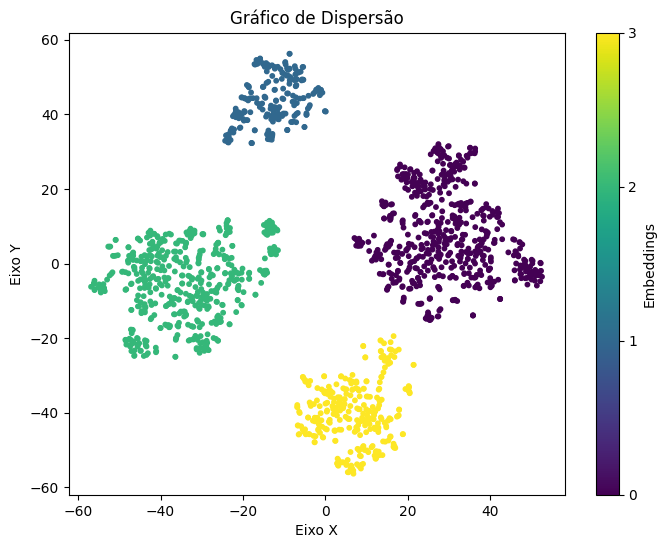

In [53]:
# Extrair os valores x e y do all_vectors
x_values = all_vectors_tsne[:, 0]  # Valores da primeira coluna
y_values = all_vectors_tsne[:, 1]  # Valores da segunda coluna

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=10, c=y)  # Altere os parâmetros conforme necessário
plt.colorbar(ticks=[0, 1, 2, 3], label='Embeddings')

# Adicionar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão')

# Mostrar o gráfico
plt.show()

#### 7. Classificação

In [54]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.me




Epoch 1/50


39/39 [==============================] - 1s 10ms/step - loss: 1.7900 - accuracy: 0.5437 - val_loss: 1.4246 - val_accuracy: 0.7742
Epoch 2/50
39/39 [==============================] - 0s 5ms/step - loss: 1.2491 - accuracy: 0.7484 - val_loss: 1.0222 - val_accuracy: 0.8032
Epoch 3/50
39/39 [==============================] - 0s 4ms/step - loss: 0.9676 - accuracy: 0.7953 - val_loss: 0.8389 - val_accuracy: 0.8194
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: 0.8412 - accuracy: 0.8131 - val_loss: 0.7699 - val_accuracy: 0.8129
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: 0.7687 - accuracy: 0.8212 - val_loss: 0.7151 - val_accuracy: 0.8129
Epoch 6/50
39/39 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.8285 - val_loss: 0.6818 - val_accuracy: 0.8548
Epoch 7/50
39/39 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.8406 - val_loss: 0.6442 - val_accuracy: 0.8677
Epoch 8/50
39/

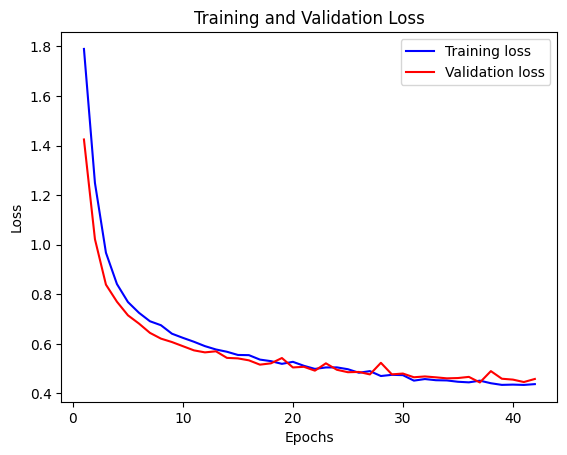

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(all_vectors, y, test_size=0.2, random_state=42)

# Dividindo novamente os dados de treino para obter dados de validação (80% para treino, 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Construção do Modelo de Rede Neural com Dropout
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005), input_shape=(all_vectors.shape[1],)),
    Dropout(0.5),  # Adicionando Dropout com uma taxa de 0.5 (50% das unidades serão desligadas aleatoriamente)
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),  # Regularização L2
    Dense(4, activation='softmax')  
])

# Compilação do Modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definindo EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Define um limite de paciência para a parada

# Treinamento do Modelo com EarlyStopping e Dropout
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Avaliação do Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Acesso aos valores de perda durante o treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Número de épocas
epochs = range(1, len(train_loss) + 1)

# Plot da perda de treino e validação ao longo das épocas
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [89]:
import pandas as pd

# Fazendo previsões nos dados de teste
predictions = model.predict(X_test)

# Obtendo as classes previstas para cada exemplo nos dados de teste
predicted_classes = np.argmax(predictions, axis=1)  # Encontrando a classe com maior probabilidade para cada exemplo

# Criando um DataFrame do pandas para visualização
df_predictions = pd.DataFrame({'Classe Verdadeira': y_test, 'Classe Prevista': predicted_classes})
df_predictions

13/13 [==============================] - 0s 3ms/step


,Classe Verdadeira,Classe Prevista
0,1.0,1
1,1.0,1
2,0.0,1
3,2.0,2
4,3.0,3
...,...,...
382,2.0,2
383,1.0,1
384,2.0,2
385,1.0,1


#### 8. Mapeamento dos indíces

##### 8.1. DataFrame das labels

In [105]:
labels = pd.DataFrame(y, columns=['labels'])
labels.value_counts()

labels
1.0       700
2.0       488
3.0       483
0.0       262
Name: count, dtype: int64

##### 8.2. DataFrame dos Chunks (textos)

In [108]:
texts = []
for i in range(len(texts_CO)):
    texts.append(texts_CO[i])

for j in range(len(texts_MO)):
    texts.append(texts_MO[j])

for k in range(len(texts_FE)):
    texts.append(texts_FE[k])

for l in range(len(texts_DW)):
    texts.append(texts_DW[l])

len(texts)

1933

In [114]:
chunks = pd.DataFrame(texts, columns=['Documents', 'data', 'type'])
chunks

,Documents,data,type
0,"(page_content, COSMOS Quasar dentro de ...","(metadata, {})","(type, Document)"
1,"(page_content, 1952 b y Encyclopaedia Britanni...","(metadata, {})","(type, Document)"
2,"(page_content, Introdução / XI \n \n1. As Fron...","(metadata, {})","(type, Document)"
3,"(page_content, nós estará apagada. O nosso uni...","(metadata, {})","(type, Document)"
4,"(page_content, distinto para entender o univer...","(metadata, {})","(type, Document)"
...,...,...,...
1928,"(page_content, nas acima do tarso, e sem membr...","(metadata, {})","(type, Document)"
1929,"(page_content, corais. \nPreênsil - Capaz de...","(metadata, {})","(type, Document)"
1930,"(page_content, Roedores - Mamíferos roedores,...","(metadata, {})","(type, Document)"
1931,"(page_content, Tentáculos - órgãos carnudos d...","(metadata, {})","(type, Document)"


##### 8.3. DataFrame dos embeddings

In [115]:
vectors = pd.DataFrame(all_vectors)
vectors

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.008109,0.000139,-0.000368,-0.021159,-0.028239,0.026524,-0.010538,-0.020047,-0.013619,-0.011718,...,-0.009427,-0.004775,0.022586,-0.015382,-0.032383,-0.008075,0.000694,0.002789,-0.001579,-0.028513
1,0.003846,0.006312,-0.000114,-0.014176,-0.005989,0.040961,-0.021703,-0.012356,-0.001897,-0.001610,...,-0.013125,-0.015165,0.035879,-0.030934,-0.033104,0.001873,0.003228,-0.010268,0.016895,-0.023928
2,0.024923,0.003629,0.003976,-0.013369,-0.017638,0.026764,-0.021494,-0.033702,-0.019520,0.023949,...,0.017198,-0.002620,0.030900,-0.029620,-0.018826,-0.009353,0.002470,-0.004710,-0.007452,-0.038772
3,0.018919,-0.000387,0.027265,-0.011459,-0.013132,0.020145,-0.004130,-0.006793,-0.005306,-0.006953,...,0.006213,-0.012159,0.037358,-0.035731,-0.031998,0.002370,0.013772,0.010379,0.003270,-0.030238
4,0.013440,-0.014803,0.007955,-0.029237,-0.002408,0.030133,-0.012525,-0.014987,-0.010839,-0.012689,...,-0.007349,-0.008435,0.028579,-0.032582,-0.025787,0.001278,-0.010773,0.001436,-0.017700,-0.018306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,-0.021056,0.007817,0.016347,-0.001759,-0.010306,0.034255,0.001907,-0.007279,-0.025523,-0.002319,...,0.014625,-0.003845,0.014329,-0.042086,-0.022684,-0.008732,0.021756,-0.007003,-0.016711,-0.023868
1929,-0.000469,0.003390,0.008350,0.002207,-0.004219,0.023524,0.007180,-0.012514,-0.011201,-0.016959,...,0.014484,-0.007317,-0.000368,-0.037693,-0.026779,0.003724,0.021021,0.006582,-0.040484,-0.019517
1930,-0.008906,0.022286,0.000999,-0.010422,-0.014821,0.009647,0.004929,-0.028881,-0.015569,-0.017554,...,0.009661,-0.006238,-0.002670,-0.017500,-0.017840,-0.004966,0.024271,0.000658,-0.017514,-0.014631
1931,-0.007885,0.002202,0.029048,-0.000265,-0.005041,0.031758,-0.013032,-0.029896,-0.010116,-0.007543,...,0.012115,-0.001494,0.001134,-0.035235,-0.023627,-0.009699,0.009897,0.013333,-0.020232,-0.020520


##### 8.4. DataFrame de mapeamento final

In [188]:
map = pd.concat([vectors, chunks, labels], axis=1)
map.head()

,0,1,2,3,4,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,Documents,data,type,labels
0,-0.008109,0.000139,-0.000368,-0.021159,-0.028239,0.026524,-0.010538,-0.020047,-0.013619,-0.011718,...,-0.032383,-0.008075,0.000694,0.002789,-0.001579,-0.028513,"(page_content, COSMOS Quasar dentro de ...","(metadata, {})","(type, Document)",3.0
1,0.003846,0.006312,-0.000114,-0.014176,-0.005989,0.040961,-0.021703,-0.012356,-0.001897,-0.001610,...,-0.033104,0.001873,0.003228,-0.010268,0.016895,-0.023928,"(page_content, 1952 b y Encyclopaedia Britanni...","(metadata, {})","(type, Document)",3.0
2,0.024923,0.003629,0.003976,-0.013369,-0.017638,0.026764,-0.021494,-0.033702,-0.019520,0.023949,...,-0.018826,-0.009353,0.002470,-0.004710,-0.007452,-0.038772,"(page_content, Introdução / XI \n \n1. As Fron...","(metadata, {})","(type, Document)",3.0
3,0.018919,-0.000387,0.027265,-0.011459,-0.013132,0.020145,-0.004130,-0.006793,-0.005306,-0.006953,...,-0.031998,0.002370,0.013772,0.010379,0.003270,-0.030238,"(page_content, nós estará apagada. O nosso uni...","(metadata, {})","(type, Document)",3.0
4,0.013440,-0.014803,0.007955,-0.029237,-0.002408,0.030133,-0.012525,-0.014987,-0.010839,-0.012689,...,-0.025787,0.001278,-0.010773,0.001436,-0.017700,-0.018306,"(page_content, distinto para entender o univer...","(metadata, {})","(type, Document)",3.0


#### 9. Centróides dos Embeddings

##### 9.1. Centróides

In [167]:
embeddings = [vectors_CO, vectors_MO, vectors_FE, vectors_DW]
centroids = []
for i in range(4):
    centroids.append(np.mean(embeddings[i], axis=0))
    
centroids = np.array(centroids)
centroids

array([[ 0.00363461,  0.00038042,  0.00857072, ...,  0.00506823,
        -0.00932994, -0.0253354 ],
       [-0.00567087,  0.00436493,  0.00036165, ...,  0.00662455,
        -0.00867384, -0.03799482],
       [-0.0074585 , -0.00297305,  0.01342443, ..., -0.00193423,
        -0.00588712, -0.02071042],
       [-0.00361168,  0.00062891,  0.01342608, ..., -0.00337134,
        -0.01038233, -0.02090858]])

##### 9.2. Redução da dimensionalidade dos centróides

In [168]:
all_vectors_with_centroids = np.concatenate((all_vectors, centroids), axis=0)

In [169]:
# Implementação do T-SNE
t0 = time.time()
all_vectors_centroids_tsne = TSNE(n_components=2, random_state=42).fit_transform(all_vectors_with_centroids)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 5.5 s


In [173]:
all_vectors_centroids_tsne

array([[  0.5917415 , -11.270311  ],
       [ -6.996179  ,  -3.4280896 ],
       [ -0.19996598, -10.651475  ],
       ...,
       [-18.081472  , -39.418373  ],
       [-24.884079  ,  13.725253  ],
       [ 18.360994  ,  21.58472   ]], dtype=float32)

In [178]:
all_vectors_tsne, centroids_tsne = all_vectors_centroids_tsne[:-4], all_vectors_centroids_tsne[-4:]

In [179]:
all_vectors_tsne.shape, centroids_tsne.shape

((1933, 2), (4, 2))

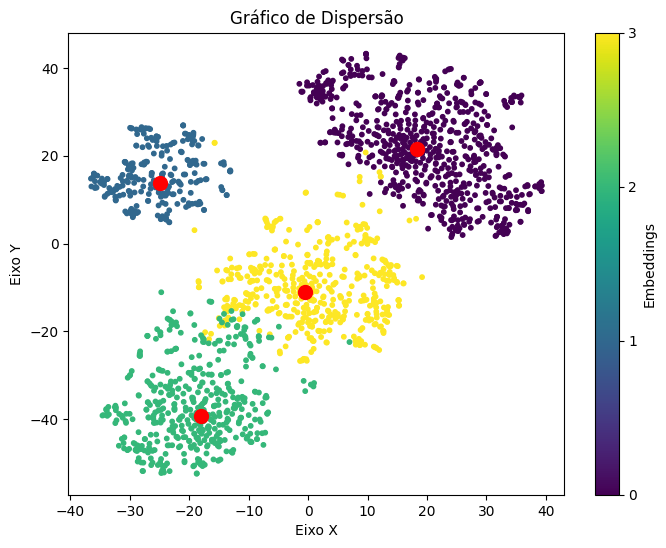

In [274]:
# Extrair os valores x e y do all_vectors
x_values = all_vectors_tsne[:, 0]  # Valores da primeira coluna
y_values = all_vectors_tsne[:, 1]  # Valores da segunda coluna

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=10, c=y)  
plt.colorbar(ticks=[0, 1, 2, 3], label='Embeddings')

# Plotando os centróides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=100, c='red', label='Centroids')

# Adicionar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão')

# Mostrar o gráfico
plt.show()

#### 10. Análise entre Cosmos e Física Básica

In [220]:
cos_moy = map.loc[(map['labels'] == 3) | (map['labels'] == 2), :]
cos_moy.head()

,0,1,2,3,4,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,Documents,data,type,labels
0,-0.008109,0.000139,-0.000368,-0.021159,-0.028239,0.026524,-0.010538,-0.020047,-0.013619,-0.011718,...,-0.032383,-0.008075,0.000694,0.002789,-0.001579,-0.028513,"(page_content, COSMOS Quasar dentro de ...","(metadata, {})","(type, Document)",3.0
1,0.003846,0.006312,-0.000114,-0.014176,-0.005989,0.040961,-0.021703,-0.012356,-0.001897,-0.001610,...,-0.033104,0.001873,0.003228,-0.010268,0.016895,-0.023928,"(page_content, 1952 b y Encyclopaedia Britanni...","(metadata, {})","(type, Document)",3.0
2,0.024923,0.003629,0.003976,-0.013369,-0.017638,0.026764,-0.021494,-0.033702,-0.019520,0.023949,...,-0.018826,-0.009353,0.002470,-0.004710,-0.007452,-0.038772,"(page_content, Introdução / XI \n \n1. As Fron...","(metadata, {})","(type, Document)",3.0
3,0.018919,-0.000387,0.027265,-0.011459,-0.013132,0.020145,-0.004130,-0.006793,-0.005306,-0.006953,...,-0.031998,0.002370,0.013772,0.010379,0.003270,-0.030238,"(page_content, nós estará apagada. O nosso uni...","(metadata, {})","(type, Document)",3.0
4,0.013440,-0.014803,0.007955,-0.029237,-0.002408,0.030133,-0.012525,-0.014987,-0.010839,-0.012689,...,-0.025787,0.001278,-0.010773,0.001436,-0.017700,-0.018306,"(page_content, distinto para entender o univer...","(metadata, {})","(type, Document)",3.0


Epoch 1/50
20/20 [==============================] - 1s 19ms/step - loss: 1.2781 - accuracy: 0.7677 - val_loss: 1.0296 - val_accuracy: 0.9295
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.8656 - accuracy: 0.9177 - val_loss: 0.6943 - val_accuracy: 0.9359
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.9435 - val_loss: 0.4886 - val_accuracy: 0.9487
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.4568 - accuracy: 0.9597 - val_loss: 0.3951 - val_accuracy: 0.9551
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.9516 - val_loss: 0.3681 - val_accuracy: 0.9679
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.9710 - val_loss: 0.3141 - val_accuracy: 0.9679
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.9774 - val_loss: 0.2918 - val_accuracy: 0.9744
Epoch 8/50
20/20 [=

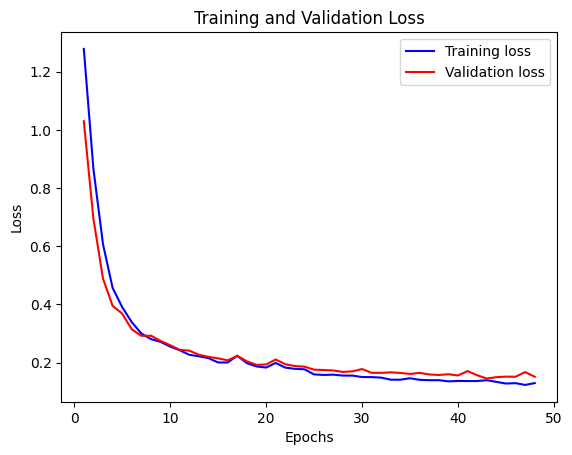

In [318]:
# Classificação binária
from sklearn.preprocessing import LabelEncoder

# Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(cos_moy.iloc[:, 0:1536], cos_moy['labels'], test_size=0.2, random_state=42)

# Dividindo novamente os dados de treino para obter dados de validação (80% para treino, 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Instanciando e aplicando o LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Construção do Modelo de Rede Neural com Dropout
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005), input_shape=(all_vectors.shape[1],)),
    Dropout(0.5),  # Adicionando Dropout com uma taxa de 0.5 (50% das unidades serão desligadas aleatoriamente)
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),  # Regularização L2
    Dense(len(label_encoder.classes_), activation='softmax')  
])

# Compilação do Modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definindo EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Define um limite de paciência para a parada

# Treinamento do Modelo com EarlyStopping e Dropout
history = model.fit(X_train.to_numpy(), y_train_encoded, epochs=50, batch_size=32, validation_data=(X_val.to_numpy(), y_val_encoded), callbacks=[early_stopping])

# Avaliação do Modelo
loss, accuracy = model.evaluate(X_test.to_numpy(), y_test_encoded)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Acesso aos valores de perda durante o treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Número de épocas
epochs = range(1, len(train_loss) + 1)

# Plot da perda de treino e validação ao longo das épocas
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [319]:
import pandas as pd

# Fazendo previsões nos dados de teste
predictions = model.predict(X_test.to_numpy())

# Obtendo as classes previstas para cada exemplo nos dados de teste
predicted_classes = np.argmax(predictions, axis=1)  # Encontrando a classe com maior probabilidade para cada exemplo

# Criando um DataFrame do pandas para visualização
df_predictions = pd.DataFrame({'Classe Verdadeira': y_test_encoded, 'Classe Prevista': predicted_classes})
df_predictions

7/7 [==============================] - 0s 4ms/step


,Classe Verdadeira,Classe Prevista
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
190,0,0
191,0,0
192,0,0
193,1,1


In [320]:
predictions

array([[0.01491759, 0.9850824 ],
       [0.9945656 , 0.00543439],
       [0.02418351, 0.9758164 ],
       [0.06006251, 0.9399375 ],
       [0.297228  , 0.70277196],
       [0.99575824, 0.00424174],
       [0.99770194, 0.0022981 ],
       [0.9978756 , 0.00212438],
       [0.00880124, 0.9911987 ],
       [0.99829394, 0.00170605],
       [0.9766866 , 0.02331343],
       [0.07922168, 0.9207783 ],
       [0.00465564, 0.99534434],
       [0.06397277, 0.9360273 ],
       [0.00330005, 0.9967    ],
       [0.05690391, 0.9430961 ],
       [0.9925938 , 0.00740617],
       [0.99718326, 0.00281669],
       [0.94938725, 0.0506128 ],
       [0.00566764, 0.9943323 ],
       [0.00951139, 0.9904885 ],
       [0.9901018 , 0.00989821],
       [0.02290815, 0.97709185],
       [0.00442654, 0.9955734 ],
       [0.01016506, 0.98983496],
       [0.00582338, 0.9941766 ],
       [0.0095491 , 0.9904509 ],
       [0.6293798 , 0.37062022],
       [0.00495846, 0.99504155],
       [0.99724007, 0.00275992],
       [0.

In [321]:
pred_df = pd.DataFrame(predictions, columns=['prob_MO', 'prob_CO'])
pred_df

,prob_MO,prob_CO
0,0.014918,0.985082
1,0.994566,0.005434
2,0.024184,0.975816
3,0.060063,0.939937
4,0.297228,0.702772
...,...,...
190,0.998327,0.001673
191,0.997014,0.002986
192,0.997312,0.002688
193,0.004318,0.995682


In [322]:
pred_df = pred_df.set_index(X_test.index)
pred_df

,prob_MO,prob_CO
168,0.014918,0.985082
836,0.994566,0.005434
76,0.024184,0.975816
70,0.060063,0.939937
88,0.297228,0.702772
...,...,...
965,0.998327,0.001673
633,0.997014,0.002986
557,0.997312,0.002688
33,0.004318,0.995682


In [ ]:
def entropy(row):
    return -sum([x*np.log(x) for x in row])

In [323]:
preds = list(predictions)
entropys = []
for pred in preds:
    entropys.append(entropy(pred))

entropys

[0.07753743,
 0.033759996,
 0.11390183,
 0.22713949,
 0.6084973,
 0.027404465,
 0.016257904,
 0.015196182,
 0.050417513,
 0.012578219,
 0.1106683,
 0.27686438,
 0.029644063,
 0.23776159,
 0.02215042,
 0.21836212,
 0.043709215,
 0.019352935,
 0.2003156,
 0.034970183,
 0.05374414,
 0.05553326,
 0.10915091,
 0.028409233,
 0.056758616,
 0.035772756,
 0.053919163,
 0.65928495,
 0.031259004,
 0.01901908,
 0.2724399,
 0.032601442,
 0.1938346,
 0.038145155,
 0.34401184,
 0.017681446,
 0.0678378,
 0.1268265,
 0.03726095,
 0.15404241,
 0.06212053,
 0.022644494,
 0.036820065,
 0.060423195,
 0.025853854,
 0.040736325,
 0.11107125,
 0.012496104,
 0.03646143,
 0.36460203,
 0.69133925,
 0.030035183,
 0.015653893,
 0.047801305,
 0.46899602,
 0.0137255285,
 0.009892015,
 0.20116955,
 0.04547889,
 0.15356335,
 0.22313753,
 0.11107193,
 0.022333367,
 0.06760849,
 0.6564524,
 0.018911304,
 0.09905644,
 0.46156323,
 0.011944335,
 0.10055122,
 0.03351288,
 0.45270216,
 0.011097259,
 0.05582789,
 0.0275136,


In [324]:
entropys = pd.Series(entropys, index=X_test.index)
entropys

168    0.077537
836    0.033760
76     0.113902
70     0.227139
88     0.608497
         ...   
965    0.012366
633    0.020344
557    0.018592
33     0.027821
31     0.033904
Length: 195, dtype: float32

In [325]:
pred_df['entropy'] = entropys
pred_df

,prob_MO,prob_CO,entropy
168,0.014918,0.985082,0.077537
836,0.994566,0.005434,0.033760
76,0.024184,0.975816,0.113902
70,0.060063,0.939937,0.227139
88,0.297228,0.702772,0.608497
...,...,...,...
965,0.998327,0.001673,0.012366
633,0.997014,0.002986,0.020344
557,0.997312,0.002688,0.018592
33,0.004318,0.995682,0.027821


In [326]:
pred_df_sorted = pred_df.sort_values(by='entropy', ascending=False)
pred_df_sorted

,prob_MO,prob_CO,entropy
530,0.500911,0.499089,0.693146
807,0.530057,0.469943,0.691339
86,0.440571,0.559429,0.686067
921,0.394895,0.605105,0.670887
795,0.629380,0.370620,0.659285
...,...,...,...
846,0.998524,0.001476,0.011097
876,0.998627,0.001373,0.010422
865,0.998645,0.001355,0.010303
874,0.998707,0.001293,0.009892


In [327]:
pred_df_sorted['entropy'].head(15)

530    0.693146
807    0.691339
86     0.686067
921    0.670887
795    0.659285
778    0.656452
88     0.608497
497    0.547039
334    0.497064
552    0.468996
799    0.461563
801    0.452702
780    0.406246
788    0.364602
531    0.344012
Name: entropy, dtype: float32

In [328]:
idx_entropy = pred_df_sorted['entropy'].index[:10]
idx_entropy

Index([530, 807, 86, 921, 795, 778, 88, 497, 334, 552], dtype='int64')

In [329]:
print(cos_moy.loc[921, 'Documents'][1])

grande, levando consigo moscas, borboletas e outros animaizinhos voadores. Leve 
também um grande aquário com alguns peixes, pendure uma garrafa pingando gota a gota num recipiente largo debaixo dela. Com o navio parado, observe cuidadosamente como os animaizinhos voam com a mesma velocidade em todas as direções na cabine. Os peixes nadam indiferentemente em todas as direções; as gotas caem no recipiente em baixo da garrafa; e, ao jogar algo a seu amigo, não é preciso jogar com mais força numa direção do que em outra, as distâncias sendo iguais; ao saltar de pés juntos, você atravessa distâncias iguais em qualquer direção. Depois de observar cuidadosa-mente todas essas coisas (embora não haja dúvida de que têm de ocorrer desta forma com o navio parado), faça o navio deslocar-se com a velocidade que quiser, contanto que o movimento seja uniforme e não flutue para um lado ou outro. Você não percebe-rá a mínima alteração em qualquer dos efeitos mencionados, e será impossível dizer por qua

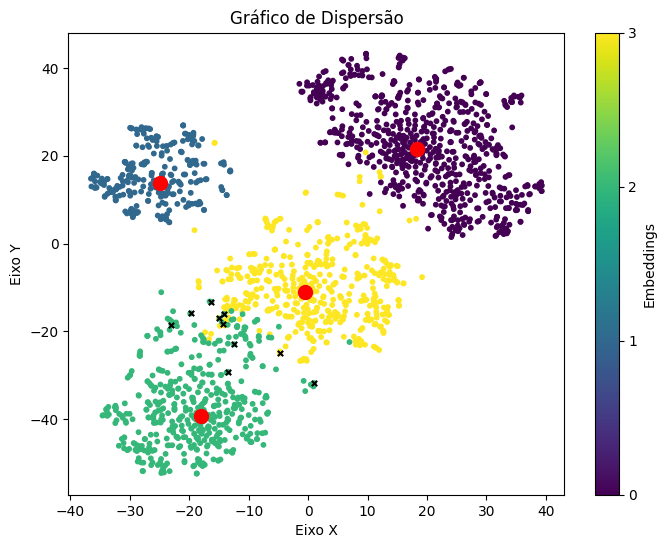

In [330]:
# Extrair os valores x e y do all_vectors
x_values = all_vectors_tsne[:, 0]  # Valores da primeira coluna
y_values = all_vectors_tsne[:, 1]  # Valores da segunda coluna

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=10, c=y)  
plt.colorbar(ticks=[0, 1, 2, 3], label='Embeddings')

# Plotando os centróides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=100, c='red', label='Centroids')
plt.scatter(all_vectors_tsne[idx_entropy, 0], all_vectors_tsne[idx_entropy, 1], s=15, c='black', label='Entropy', marker='x')

# Adicionar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão')

# Mostrar o gráfico
plt.show()

#### 11. Entropia

In [213]:
entropy = lambda probs: -np.sum(probs * np.log(probs))

In [101]:
probs = np.array([0.1, 0.1, 0.4, 0.4])
entropy = -np.sum(probs * np.log(probs))


In [102]:
entropy

1.1935496040981333

In [ ]:
entropy = lambda p: -p*np.log2(p) - (1-p)*np.log2(1-p) # classificação binária

In [ ]:
probs = np.array([0.1, 0.2, 0.3, 0.4])
entropy = -np.sum(probs * np.log(probs))

Entropia: medida do quão aleatório é uma variável aleatória 

Como determinar o limite da entropia (discreta)?

#### 12. Similaridade Cosseno

In [331]:
cossine_similarity = lambda u, v: np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

Vamos fixar o livro de Carl Sagan e verificar quais textos (`Chunks`) do livro de Física Básica do Moyses que mais se assemelham semanticamente com o tema central do livro Cosmos.

In [332]:
# Chunks de Fisica Basica
cos_moy.iloc[483:, 0:1536].to_numpy()

array([[-0.01192788,  0.01610364, -0.00277718, ..., -0.01884751,
         0.00180317, -0.03801471],
       [ 0.01028032,  0.01636079, -0.00053869, ...,  0.00081862,
        -0.01556336, -0.03681511],
       [-0.01501961,  0.00878544,  0.00098845, ..., -0.01581517,
         0.0212332 , -0.03061531],
       ...,
       [ 0.01220175,  0.02457334,  0.01437037, ..., -0.00262913,
        -0.00729623, -0.03725846],
       [ 0.00642016,  0.01662001,  0.00815058, ...,  0.00854914,
         0.00100139, -0.04883705],
       [ 0.01621389,  0.00144092,  0.00712589, ..., -0.02150362,
        -0.00950561, -0.03171188]])

In [333]:
similarities = []
for i in range(483, 971):
    similarities.append(cossine_similarity(cos_moy.iloc[i, 0:1536].to_numpy(), centroids_tsne[0])) 

similarities

[0.8822131161544138,
 0.9093134749180741,
 0.8736126430109948,
 0.8876889816613324,
 0.8883571483512757,
 0.8751471813972375,
 0.8417510549003813,
 0.8421104603408144,
 0.8431147549703234,
 0.852649460189607,
 0.8802404786297123,
 0.8322688695975609,
 0.8788546658365738,
 0.8951544417195954,
 0.8904266365552889,
 0.8926321753750448,
 0.893488744568327,
 0.8946461455492373,
 0.9036488449701254,
 0.901577608707865,
 0.883332676809538,
 0.9129251401316898,
 0.8721215849639309,
 0.8334400091758787,
 0.8433280344753991,
 0.8533976371958668,
 0.8812975578775633,
 0.8636248656756174,
 0.8765780744716007,
 0.8746612648030687,
 0.8960064743339519,
 0.9085158830185912,
 0.8922820582280041,
 0.9080287962895107,
 0.8642761261097999,
 0.8884808120097938,
 0.8818273475371058,
 0.8864582171956578,
 0.8879386616285287,
 0.8735377862731533,
 0.8761349674731356,
 0.8796359880639494,
 0.8833623670249112,
 0.8740840256225149,
 0.8696888556576599,
 0.8657709229881317,
 0.8803548958093675,
 0.89347886326831

In [334]:
similarities = pd.Series(similarities, index=cos_moy.iloc[483:, 0:1536].index)
idx_similarity = similarities.sort_values(ascending=False).index[:15]
idx_similarity

Index([773, 770, 769, 805, 782, 783, 777, 803, 772, 806, 504, 947, 799, 802,
       800],
      dtype='int64')

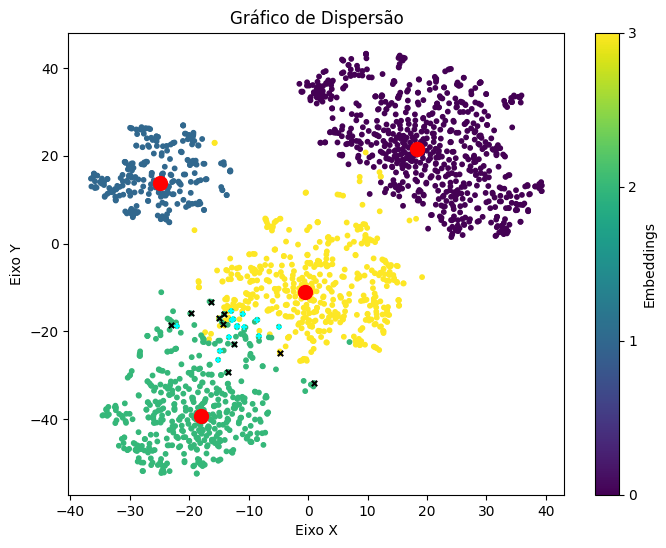

In [335]:
# Extrair os valores x e y do all_vectors
x_values = all_vectors_tsne[:, 0]  # Valores da primeira coluna
y_values = all_vectors_tsne[:, 1]  # Valores da segunda coluna

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=10, c=y)  
plt.colorbar(ticks=[0, 1, 2, 3], label='Embeddings')

# Plotando os centróides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=100, c='red', label='Centroids')
plt.scatter(all_vectors_tsne[idx_entropy, 0], all_vectors_tsne[idx_entropy, 1], s=15, c='black', label='Entropy', marker='x')
plt.scatter(all_vectors_tsne[idx_similarity, 0], all_vectors_tsne[idx_similarity, 1], s=15, c='cyan', label='Entropy', marker='+')

# Adicionar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão')

# Mostrar o gráfico
plt.show()

In [317]:
print(cos_moy.loc[773, 'Documents'][1])

(Figura 10.7) seria diferente em diferentes épocas do ano (θ
1 ≠ θ2 na figura), e esse efeito de paralaxe 
nunca fora observado. Não se concebia, natural-mente, que as estrelas, mesmo as mais próximas da Terra, estão tão distantes que o efeito é inob-servável a olho nu; mesmo com telescópios, só foi detectado em 1838.
O grande tratado de Copérnico “De Revolutio-
nibus Orbium Celestium” (“Sobre as Revoluções das Esferas Celestes”, 1543), como o título indica, era conceitualmente ainda bastante próximo da astronomia grega. O que ele procurou demonstrar foi que a principal vantagem do ponto de vista heliocêntrico seria a de simplificar  a descrição, explicando as mesmas observações anteriores por 
meio de movimentos ainda mais próximos do ideal platônico, sem utilizar, por exemplo, o artifício dos equantes de Ptolomeu.
A passagem da descrição geocêntrica à he-
liocêntrica está ilustrada na Figura 10.8 para a órbita de Vênus (V), que é um dos planetas in-
ternos , ou seja, situado entre a 